In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy import stats
from scipy import spatial
import time
from sklearn.metrics import mean_absolute_error
import random
import math
import time
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('/content/drive/MyDrive/RIT/Sem 6/Mini Project/dataset/oil_end.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
data.columns = ['date','ppb']

In [17]:
data = data.bfill()
print(data)
print(data.shape[0])

           date     ppb
0    06/23/2020   42.72
1    06/24/2020   40.40
2    06/25/2020   41.18
3    06/26/2020   40.97
4    06/29/2020   41.58
..          ...     ...
496  06-03-2022  125.68
497  06-06-2022  124.99
498  06-07-2022  126.89
499  06-08-2022  129.20
500  06-09-2022  128.47

[501 rows x 2 columns]
501


In [18]:
ppb_mean= data.ppb.mean()
ppb_DiffMean = data.ppb.diff().mean()
ppb_Diff_Var = (np.var(data.ppb.diff()))**(1/2)
nDay = 120

In [7]:
print(ppb_mean, ppb_DiffMean, ppb_Diff_Var )

52.74534136546185 0.11826612903225805 1.1189953631377232


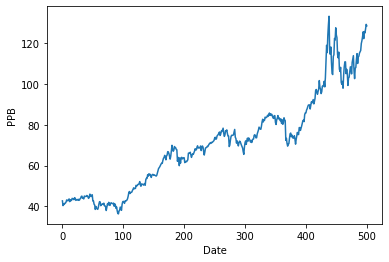

In [19]:
#display input
plt.plot(data['ppb'])
plt.xlabel('Date')
plt.ylabel('PPB')
plt.show()

In [20]:
def justice_data(dataFrame,Series,day_range):
    for i in range(dataFrame.shape[0]-day_range*4):
      values_mean = Series[dataFrame.shape[0]-day_range*2:dataFrame.shape[0]].values.mean()
      Series[i:i+nDay*2] = Series[i:i+nDay*2] + (values_mean-Series[i:i+nDay*2].mean())
        
        
    return dataFrame

In [21]:
def createPopulation(adet,day_range,mean,diffmean):
    Population = []
    for i in range(adet):
        gen = []
        for j in range(day_range*2):
            gen.append(random.randint(int(mean-diffmean)-1,int(mean+diffmean)+1))
    Population.append(gen)
        
    return Population

In [22]:
def train(dataFrame,Series,GenPool,day_range):
    selected_genes = []
    
    for i in range(dataFrame.shape[0]-day_range*2):
        values = Series[i:i+day_range*2].values
        min_mae = mean_absolute_error(GenPool[0],values)

        for gen in GenPool:
            mae = mean_absolute_error(gen,values)

            if mae <= min_mae:
                min_mae = mae
                selected_genes.append([GenPool.index(gen),i])
                
           
    return selected_genes


In [23]:
print(data)

           date     ppb
0    06/23/2020   42.72
1    06/24/2020   40.40
2    06/25/2020   41.18
3    06/26/2020   40.97
4    06/29/2020   41.58
..          ...     ...
496  06-03-2022  125.68
497  06-06-2022  124.99
498  06-07-2022  126.89
499  06-08-2022  129.20
500  06-09-2022  128.47

[501 rows x 2 columns]


In [24]:
pd.set_option('mode.chained_assignment',None)
for i in range(10):
    data_train = justice_data(data,data.ppb,nDay)
print(data_train)

           date         ppb
0    06/23/2020   76.369033
1    06/24/2020   74.288525
2    06/25/2020   75.200091
3    06/26/2020   75.157433
4    06/29/2020   75.910718
..          ...         ...
496  06-03-2022  125.680000
497  06-06-2022  124.990000
498  06-07-2022  126.890000
499  06-08-2022  129.200000
500  06-09-2022  128.470000

[501 rows x 2 columns]


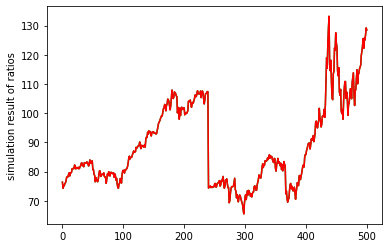

In [25]:
plt.plot(data_train.ppb,color = 'green')
plt.plot(data.ppb,color ='red')
plt.ylabel('simulation result of ratios')
plt.show()

In [26]:
genPool = createPopulation(2000, nDay, ppb_mean, ppb_DiffMean)
selected_genes = train(data_train, data_train.ppb, genPool, nDay)

In [27]:
print(genPool)
print(data_train.ppb)
print(nDay)
print(selected_genes)

[[70, 71, 69, 69, 72, 69, 72, 70, 69, 69, 70, 70, 72, 72, 72, 69, 70, 71, 69, 69, 71, 69, 72, 71, 69, 69, 70, 72, 70, 69, 72, 72, 70, 69, 72, 71, 71, 70, 71, 71, 70, 70, 72, 72, 70, 72, 69, 72, 70, 70, 69, 71, 71, 72, 70, 69, 71, 71, 72, 72, 70, 69, 72, 69, 72, 69, 71, 72, 71, 69, 71, 70, 70, 69, 69, 72, 70, 70, 70, 72, 70, 70, 69, 72, 72, 70, 72, 71, 72, 70, 70, 69, 71, 69, 69, 72, 70, 71, 69, 71, 70, 69, 70, 72, 69, 72, 71, 69, 69, 69, 71, 72, 71, 69, 72, 69, 71, 72, 70, 72, 69, 71, 71, 71, 72, 70, 72, 70, 72, 71, 69, 70, 71, 71, 72, 71, 70, 70, 71, 71, 69, 70, 70, 72, 72, 71, 70, 71, 69, 69, 72, 70, 70, 70, 71, 69, 71, 72, 70, 72, 70, 69, 72, 72, 69, 69, 72, 69, 69, 72, 72, 69, 70, 70, 69, 69, 69, 72, 70, 72, 70, 72, 71, 70, 69, 72, 71, 70, 71, 72, 72, 72, 70, 71, 69, 69, 70, 72, 71, 70, 72, 70, 69, 72, 72, 69, 70, 70, 71, 72, 70, 71, 70, 69, 69, 72, 72, 71, 71, 72, 70, 71, 72, 71, 69, 71, 70, 69, 70, 70, 70, 70, 71, 69, 71, 72, 71, 72, 72, 70]]
0       76.369033
1       74.288525
2

In [28]:
topList = []
value = 0
i = 0
j = 0
while( i <= len(selected_genes)):
    try:
        if selected_genes[j][1] == i:
            value = selected_genes[i][0]
            j += 1
        else:
            topList.append(value)
            i += 1
    except IndexError:
        break

In [29]:
priorityList, priorityList_counts = np.unique(topList,return_counts=True)
modifiedGen = []

In [30]:
def crossover(Series,day_range):
    global data
    global priorityList
    global priorityList_counts
    global genPool
    global topList 
    global modifiedGen
    genPool = np.array(genPool)
    for i in range(data.shape[0]-day_range*4,data.shape[0]-day_range*2):
        priorityList, priorityList_counts = np.unique(topList,return_counts=True)
        values = Series[i:i+day_range*2].values
        run = True
        batch_threshold = 5
        batch = 0
        while(run):
            if batch >= batch_threshold:
                run = False
            genPool_Selected = np.random.choice(priorityList,4,p = priorityList_counts/sum(priorityList_counts))
            oldGen_1_15 = np.random.choice(genPool[genPool_Selected[0]-1],int(day_range/2))
            oldGen_2_15 = np.random.choice(genPool[genPool_Selected[1]-1],int(day_range/2))
            oldGen_3_15 = np.random.choice(genPool[genPool_Selected[2]-1],int(day_range/2))
            oldGen_4_15 = np.random.choice(genPool[genPool_Selected[3]-1],int(day_range/2))
            modifiedGen =  np.concatenate((oldGen_1_15, oldGen_2_15,oldGen_3_15,oldGen_4_15),axis =None)
            target = mean_absolute_error(modifiedGen,values)
            val_1 = genPool[genPool_Selected[0]-1]
            val_2 = genPool[genPool_Selected[1]-1]
            val_3 = genPool[genPool_Selected[2]-1]
            val_4 = genPool[genPool_Selected[3]-1]
            thr_1 = mean_absolute_error(val_1,values)
            thr_2 = mean_absolute_error(val_2,values)
            thr_3 = mean_absolute_error(val_3,values)
            thr_4 = mean_absolute_error(val_4,values)
            if  target <= thr_1 and target <= thr_2 and target <= thr_3 and target <= thr_4:
                print("Completed")
                genPool = np.vstack((genPool, modifiedGen))
                topList.append(len(genPool))
                batch += 1

In [31]:
crossover(data.ppb,nDay)

Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed


In [32]:
priorityList, priorityList_counts = np.unique(topList,return_counts=True)
modifiedGen = []

In [33]:
def mutation_gen(gen,Series):
    x = np.random.choice(gen,10)
    for i in range(len(gen)):
        if gen[i] in x:
            gen[i] = np.random.choice(Series.values)
            
            
    return gen

In [34]:
def modification(Series,day_range):
    global data
    global priorityList
    global priorityList_counts
    global genPool
    global topList 
    global modifiedGen
    mutated_chromosome = np.zeros(day_range*2)
    nonMutated_chromosome = np.zeros(day_range*2)
    genPool = np.array(genPool)
    for i in range(data.shape[0]-day_range*4,data.shape[0]-day_range*2):
        priorityList, priorityList_counts = np.unique(topList,return_counts=True)
        values = Series[i:i+day_range*2].values
        run = True
        batch_threshold = 100
        batch = 0
        while(run):
            if batch >= batch_threshold:
                run = False
            genPool_Selected = np.random.choice(priorityList,1,p = priorityList_counts/sum(priorityList_counts))
            mutated_chromosome = mutation_gen(list(genPool[genPool_Selected[0]-1]),Series)
            nonMutated_chromosome = genPool[genPool_Selected[0]-1]
            thr_1 = mean_absolute_error(mutated_chromosome,values)
            org_1 = mean_absolute_error(nonMutated_chromosome,values)
            batch += 1
            if  thr_1 < org_1:
                print("Completed")
                genPool = np.vstack((genPool, mutated_chromosome))
                topList.append(len(genPool))

In [35]:
modification(data.ppb,nDay)

Streaming output truncated to the last 5000 lines.
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed

In [36]:
selectedGenes = genPool[2000:len(genPool)]
#selectedGenes means selected gens

In [37]:
def select_the_max(Series,day_range):
    global selectedGenes
    selectedGenes = list(selectedGenes)
    min_mae = mean_absolute_error(selectedGenes[0][0:day_range],Series[data.shape[0]-day_range:data.shape[0]])
    lastGen = []
    for gen in selectedGenes:
        if mean_absolute_error(gen[0:day_range],Series[data.shape[0]-day_range:data.shape[0]]) < min_mae:
            min_mae = mean_absolute_error(gen[0:day_range],Series[data.shape[0]-day_range:data.shape[0]])
            lastGen = gen
    return lastGen,min_mae

In [38]:
sonGen,Hata = select_the_max(data.ppb,nDay)

In [39]:
print(sonGen)

[ 79.31181267 114.54        71.32        82.34        84.58
  74.6832876  100.81        88.41181267  74.57127921  81.65181267
  80.97        83.53        82.40181267  76.89053346 114.86
 128.47        80.15        74.70087932 123.86       107.59181267
  84.85        80.13181267  82.89181267  73.05        91.22
  84.85        93.49181267 108.36        98.95        84.42
  75.75181267 105.92181267 110.83        83.53        77.51
  74.53       116.41        88.24181267  75.81        76.69
  88.58181267  87.98181267  80.51181267  79.20181267  77.42
  98.73        75.14        99.14181267  79.4929757   90.24
 107.59181267  98.14181267  78.95775177  79.21181267  77.51181267
 123.98        99.86181267  97.5         72.36        98.14181267
 103.08       101.86181267  77.42       105.97181267  93.22181267
 106.80181267 115.36        75.81883697  94.95        91.77181267
 104.22181267  78.34181267 113.5         94.39181267  81.96181267
  98.95        84.52       133.18        96.95181267  73.3

In [82]:
def endValueModification(Series,day_range):
    global sonGen
    threshold = 10
    Last_gen = np.zeros(day_range)
    for i in range(5000):
        mutated_chromosome = mutation_gen(list(sonGen),Series)
        target = Series[data.shape[0]-day_range:data.shape[0]]
        val_1 = sonGen[0:day_range]
        org_1 = mean_absolute_error(val_1,target)
        thr_1 = mean_absolute_error(mutated_chromosome[0:day_range],target)
        if  thr_1 < org_1:
            if (mean_absolute_error(mutated_chromosome[0:day_range],target)) < (mean_absolute_error(Last_gen[0:day_range],target)):
                Last_gen = mutated_chromosome
                print("Completed")

    for i in range(len(Last_gen)):
      if i == 0:
        pass
      else:
        if math.fabs(Last_gen[i] - Last_gen[i-1] )>= threshold:
          if i < 60:
            if Last_gen[i] < Last_gen[i-1]:
              Last_gen[i] = data['ppb'].values[data.shape[0]-nDay:data.shape[0]][i] - threshold*np.random.rand(1)
            else:
              Last_gen[i] = data['ppb'].values[data.shape[0]-nDay:data.shape[0]][i] + threshold*np.random.rand(1)
          else:
            if Last_gen[i] < Last_gen[i-1]:
              Last_gen[i] = Last_gen[i-1] - threshold*np.random.rand(1)
            else:
              Last_gen[i] = Last_gen[i-1] + threshold*np.random.rand(1)        
    
    return Last_gen

In [ ]:
def calmean(i, le, l, n):
  m = 0
  if i > n and i < l-n: 
    m = np.mean(le[i-n: i+n])
  elif i<n:
    m = np.mean(le[i: i+n])
  elif i > l-n:
    m = np.mean(le[i-n: i])

  return mean

In [91]:
last_eliminated_gen = endValueModification(data.ppb,nDay)

Completed
Completed
Completed
Completed
Completed


In [92]:
print(last_eliminated_gen)

[79.31181267109157, array([76.12293263]), 71.32, array([79.88884563]), 84.58, 74.68328759974818, array([81.12859051]), 88.41181267109157, array([72.65027742]), 81.65181267109158, 80.97, 83.53, 82.81181267109157, 76.89053345886788, array([86.83356139]), array([79.23634501]), 80.15, 78.27181267109157, array([87.78967621]), array([91.31250313]), 84.85, 80.13181267109157, 82.89181267109157, 73.05, array([98.2246168]), array([86.63662607]), 93.49181267109158, array([99.13498363]), 98.95, array([85.91368992]), array([87.19874624]), array([100.86332852]), 110.83, array([87.60476806]), array([86.67722922]), array([93.01443226]), array([101.22650869]), array([87.27348695]), array([85.62048263]), 76.69, array([100.85905055]), array([92.40391138]), array([94.84684167]), array([95.20057303]), array([87.93134602]), array([104.53697091]), array([96.7231142]), 99.14181267109157, array([91.560059]), 90.24, array([104.36274824]), 98.14181267109157, array([107.94810036]), array([114.97868709]), array([1

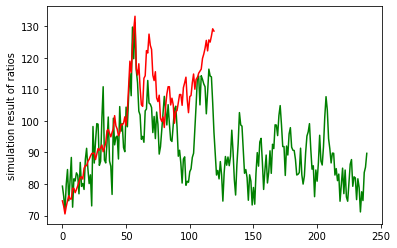

In [93]:
plt.plot(last_eliminated_gen,color = 'green')
plt.plot(data['ppb'].values[data.shape[0]-nDay:data.shape[0]],color ='red')
plt.ylabel('simulation result of ratios')
plt.show()

In [94]:
target = data.ppb[data.shape[0]-nDay:data.shape[0]]
val_1 = last_eliminated_gen[0:nDay]
org_1 = mean_absolute_error(val_1,target)
print(org_1)

9.88579623578995


In [105]:
def unwrap(l):
  op = []

  for i in range(len(l)):
    if type(l[i]) == np.ndarray:
      op.append(l[i][0])
    else:
      op.append(l[i])

  return op

In [106]:

forecast = unwrap(last_eliminated_gen[120: len(last_eliminated_gen)])
print(forecast)

[89.63725253219148, 82.84181267109157, 84.29181267109156, 81.61284778956048, 87.10649901056307, 82.84181267109157, 74.5712792122237, 83.53, 88.71181267109158, 85.95201411835001, 88.55260525350707, 85.8, 88.80269580674683, 97.05923949115754, 90.15644848580119, 81.39, 76.50181267109157, 86.07952451891478, 92.81181267109157, 102.63318524846625, 98.73089936929685, 98.33689817639454, 90.5344581408047, 83.4, 84.58, 81.99, 74.84, 82.91, 80.90206737970311, 73.34, 78.89387734701471, 73.59, 83.4, 89.94544016558942, 85.65834205210888, 93.3090206686606, 94.46362997831068, 87.03401369561061, 78.27181267109157, 84.30012148262803, 89.17368131014038, 80.32181267109156, 83.69181267109157, 90.51383012937498, 83.37392017835415, 92.58907621016186, 91.22963783978734, 98.76095511405167, 98.66211329085422, 95.33821820672159, 101.67181267109157, 104.85181267109157, 98.86780219398094, 91.8646692535342, 91.87567380168122, 82.70613349189242, 92.02529017352207, 89.18494960768122, 95.86740297372218, 97.86003667351